# Data cleaning and preparing 

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('Chest_xray_Corona_Metadata.csv')
df1

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [3]:
train_data = df1[df1['Dataset_type'] == 'TRAIN']
test_data = df1[df1['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == df1.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5489,5512,NORMAL2-IM-0374-0001.jpeg,Normal,TEST,NaN,NaN
5419,5442,NORMAL2-IM-0279-0001.jpeg,Normal,TEST,NaN,NaN
5734,5757,person90_bacteria_442.jpeg,Pnemonia,TEST,NaN,bacteria
5597,5620,person139_bacteria_661.jpeg,Pnemonia,TEST,NaN,bacteria
5380,5403,NORMAL2-IM-0331-0001.jpeg,Normal,TEST,NaN,NaN
5532,5555,person161_bacteria_757.jpeg,Pnemonia,TEST,NaN,bacteria
5456,5479,NORMAL2-IM-0173-0001-0002.jpeg,Normal,TEST,NaN,NaN
5697,5720,person104_bacteria_492.jpeg,Pnemonia,TEST,NaN,bacteria
5830,5853,person31_virus_70.jpeg,Pnemonia,TEST,NaN,Virus
5892,5915,person1653_virus_2859.jpeg,Pnemonia,TEST,NaN,Virus


In [4]:
import seaborn as sns


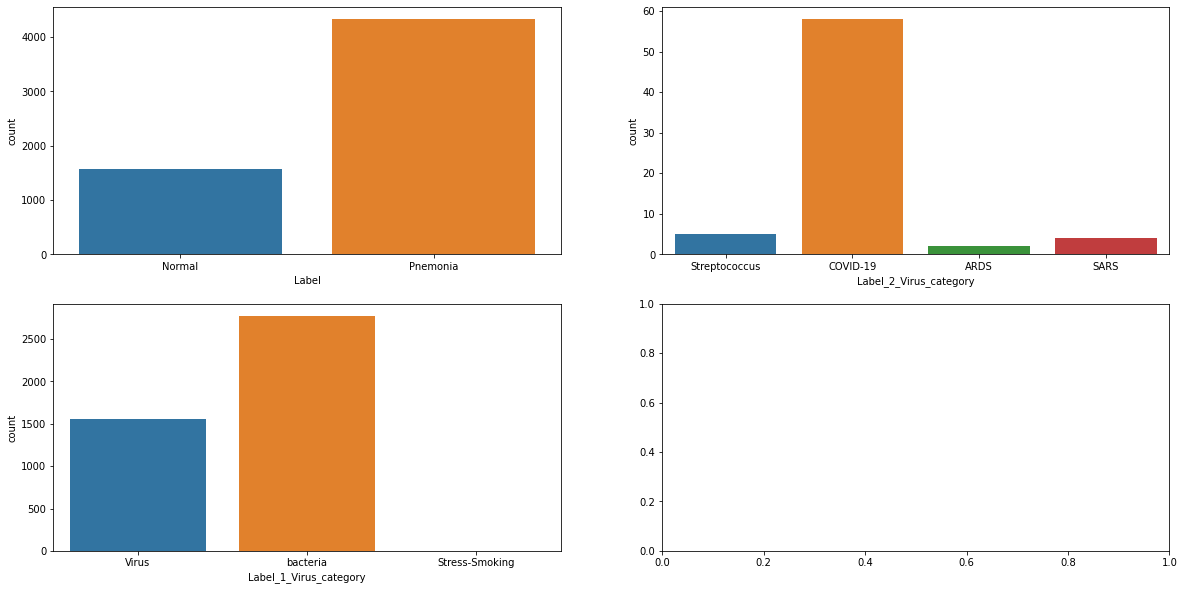

In [5]:
import matplotlib.pyplot as plt

targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=df1, ax=ax[0, 0])
sns.countplot(x=targets[1], data=df1, ax=ax[0, 1])
sns.countplot(x=targets[2], data=df1, ax=ax[1, 0])
plt.show()


### Because of the lack of data in the third classification when we classify the type of virus or bacteria causing pneumonia,we add additional data from another dataset for covid 19 

In [6]:
df2=pd.read_csv('Covid_19.csv')
df2

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,1,fff13f3a,Pnemonia,TRAIN,COVID-19,Virus
1,2,b343e657,Pnemonia,TRAIN,COVID-19,Virus
2,3,c9280a30,Pnemonia,TRAIN,COVID-19,Virus
3,4,53c9be49,Pnemonia,TRAIN,COVID-19,Virus
4,5,6b5af975,Pnemonia,TRAIN,COVID-19,Virus
...,...,...,...,...,...,...
238,239,bcb814aa,Pnemonia,TRAIN,COVID-19,Virus
239,240,a8ac1969,Pnemonia,TRAIN,COVID-19,Virus
240,241,76093afc,Pnemonia,TRAIN,COVID-19,Virus
241,242,82a78c13,Pnemonia,TRAIN,COVID-19,Virus


In [7]:
df3=pd.concat([df1,df2])
df3

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
238,239,bcb814aa,Pnemonia,TRAIN,COVID-19,Virus
239,240,a8ac1969,Pnemonia,TRAIN,COVID-19,Virus
240,241,76093afc,Pnemonia,TRAIN,COVID-19,Virus
241,242,82a78c13,Pnemonia,TRAIN,COVID-19,Virus


##### Convert the df3 to csv file : 

In [8]:
#df3.to_csv("full_version.csv")

In [9]:
# df=pd.read_csv('full_version.csv')
# df

# Finding Duplicate Images With Simple Hashing


In [10]:
import hashlib
import imageio # to read the image using imageio.imread
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from hashlib import md5

In [12]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [13]:
import os
os.getcwd()

'/mnt/c/Users/user/Doctoraizer'

In [14]:
os.chdir(r'/mnt/c/Users/user/Doctoraizer/Coronahack-Chest-XRay-Dataset/test')
os.getcwd()

'/mnt/c/Users/user/Doctoraizer/Coronahack-Chest-XRay-Dataset/test'

In [15]:
files_list = os.listdir()
print(len(files_list))

620


In [16]:
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [17]:
duplicates

[]

[(1, 0), (96, 95), (119, 118), (140, 139), (321, 320), (339, 338), (453, 452)]


In [18]:
# To display the deplicated images 
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imageio.imread(files_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imageio.imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [19]:
for index in duplicates:
    os.remove(files_list[index[0]])

In [20]:
os.chdir(r'/mnt/c/Users/user/Doctoraizer/Coronahack-Chest-XRay-Dataset/train')
os.getcwd()

'/mnt/c/Users/user/Doctoraizer/Coronahack-Chest-XRay-Dataset/train'

In [21]:
files_list = os.listdir()
print(len(files_list))

5527


In [22]:
# duplicates = []
# hash_keys = dict()
# for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
#     if os.path.isfile(filename):
#         with open(filename, 'rb') as f:
#             filehash = hashlib.md5(f.read()).hexdigest()
#         if filehash not in hash_keys: 
#             hash_keys[filehash] = index
#         else:
#             duplicates.append((index,hash_keys[filehash]))

In [23]:
# duplicates

[(1081, 1080),
 (1961, 1960),
 (2150, 2149),
 (2174, 2173),
 (2289, 2288),
 (2371, 2370),
 (2396, 2395),
 (2446, 2445),
 (2447, 2445),
 (2577, 2576),
 (2695, 2694),
 (2697, 2696),
 (2699, 2698),
 (2748, 2747),
 (3001, 3000),
 (3014, 3013),
 (3019, 3018),
 (3369, 3368),
 (3370, 3368),
 (3404, 3403),
 (3413, 3412),
 (3614, 3613),
 (3822, 3821),
 (3993, 3992),
 (4990, 4989),
 (5250, 5249)]

In [24]:
# # To display the deplicated images 
# for file_indexes in duplicates[:30]:
#     try:
    
#         plt.subplot(121),plt.imshow(imageio.imread(files_list[file_indexes[1]]))
#         plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

#         plt.subplot(122),plt.imshow(imageio.imread(files_list[file_indexes[0]]))
#         plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
#         plt.show()
    
#     except OSError as e:
#         continue

In [25]:
# for index in duplicates:
#     os.remove(files_list[index[0]])

# Remove the deplicated images manually

In [26]:
os.chdir(r'/mnt/c/Users/user/examples/Coronahack-Chest-XRay-Dataset/train')
os.getcwd()

'/mnt/c/Users/user/examples/Coronahack-Chest-XRay-Dataset/train'

In [27]:
files_list = os.listdir()
print(len(files_list))

5552


In [28]:
print(files_list[1081])
print(files_list[1961])
print(files_list[2150])
print(files_list[2174])
print(files_list[2289])
print(files_list[2371])
print(files_list[2396])
print(files_list[2446])
print(files_list[2447])
print(files_list[2577])
print(files_list[2695])
print(files_list[2697])
print(files_list[2699])
print(files_list[2748])
print(files_list[3001])
print(files_list[3014])
print(files_list[3019])
print(files_list[3369])
print(files_list[3370])
print(files_list[3404])
print(files_list[3413])
print(files_list[3614])
print(files_list[3822])
print(files_list[3993])
print(files_list[4990])
print(files_list[5250])


NORMAL2-IM-0587-0001-0002.jpeg
person1159_virus_1945.jpeg
person124_virus_247.jpeg
person1261_virus_2148.jpeg
person1312_bacteria_3318.jpeg
person1343_bacteria_3414.jpeg
person1349_bacteria_3437.jpeg
person1372_bacteria_3502.jpeg
person1372_bacteria_3503.jpeg
person1430_bacteria_3696.jpeg
person1481_bacteria_3863.jpeg
person1481_bacteria_3865.jpeg
person1481_bacteria_3867.jpeg
person1496_bacteria_3910.jpeg
person1619_bacteria_4268.jpeg
person1628_bacteria_4298.jpeg
person162_virus_322.jpeg
person258_bacteria_1208.jpeg
person258_bacteria_1209.jpeg
person264_bacteria_1231.jpeg
person266_bacteria_1238.jpeg
person30_bacteria_157.jpeg
person357_virus_735.jpeg
person401_virus_798.jpeg
person688_virus_1282.jpeg
person834_bacteria_2748.jpeg


In [29]:
os.chdir(r'/mnt/c/Users/user/examples/Coronahack-Chest-XRay-Dataset/test')
os.getcwd()

'/mnt/c/Users/user/examples/Coronahack-Chest-XRay-Dataset/test'

In [30]:
files_list = os.listdir()
print(len(files_list))

625


In [31]:
print(files_list[1])
print(files_list[96])
print(files_list[119])
print(files_list[140])
print(files_list[321])
print(files_list[339])
print(files_list[453])


IM-0001-0001.jpeg
NORMAL2-IM-0096-0001.jpeg
NORMAL2-IM-0173-0001-0002.jpeg
NORMAL2-IM-0246-0001-0002.jpeg
person128_bacteria_607.jpeg
person134_bacteria_644.jpeg
person1661_virus_2873.jpeg


In [32]:
os.chdir(r'/mnt/c/Users/user/Doctoraizer')
os.getcwd()


'/mnt/c/Users/user/Doctoraizer'

In [33]:
df_mod = pd.read_csv('full_version.csv')
df_mod

,Unnamed: 0,Unnamed: 0.1,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...,...
6115,238,239,bcb814aa,Pnemonia,TRAIN,COVID-19,Virus
6116,239,240,a8ac1969,Pnemonia,TRAIN,COVID-19,Virus
6117,240,241,76093afc,Pnemonia,TRAIN,COVID-19,Virus
6118,241,242,82a78c13,Pnemonia,TRAIN,COVID-19,Virus


In [34]:
df_mod.X_ray_image_name.count()


6120

In [35]:
len(df_mod.X_ray_image_name.unique())


6120

In [36]:
train_data = df_mod[df_mod['Dataset_type'] == 'TRAIN']
test_data = df_mod[df_mod['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == df_mod.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5503, 7)
Shape of test data : (617, 7)


,Unnamed: 0,Unnamed: 0.1,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5278,5305,5328,NORMAL2-IM-0060-0001.jpeg,Normal,TEST,NaN,NaN
5515,5545,5568,person159_bacteria_746.jpeg,Pnemonia,TEST,NaN,bacteria
5730,5762,5785,person81_bacteria_397.jpeg,Pnemonia,TEST,NaN,bacteria
5295,5322,5345,NORMAL2-IM-0007-0001.jpeg,Normal,TEST,NaN,NaN
5731,5763,5786,person81_bacteria_396.jpeg,Pnemonia,TEST,NaN,bacteria
5815,5847,5870,person1_virus_6.jpeg,Pnemonia,TEST,NaN,Virus
5847,5879,5902,person1668_virus_2882.jpeg,Pnemonia,TEST,NaN,Virus
5578,5608,5631,person135_bacteria_646.jpeg,Pnemonia,TEST,NaN,bacteria
5454,5484,5507,NORMAL2-IM-0079-0001.jpeg,Normal,TEST,NaN,NaN
5404,5431,5454,NORMAL2-IM-0252-0001.jpeg,Normal,TEST,NaN,NaN


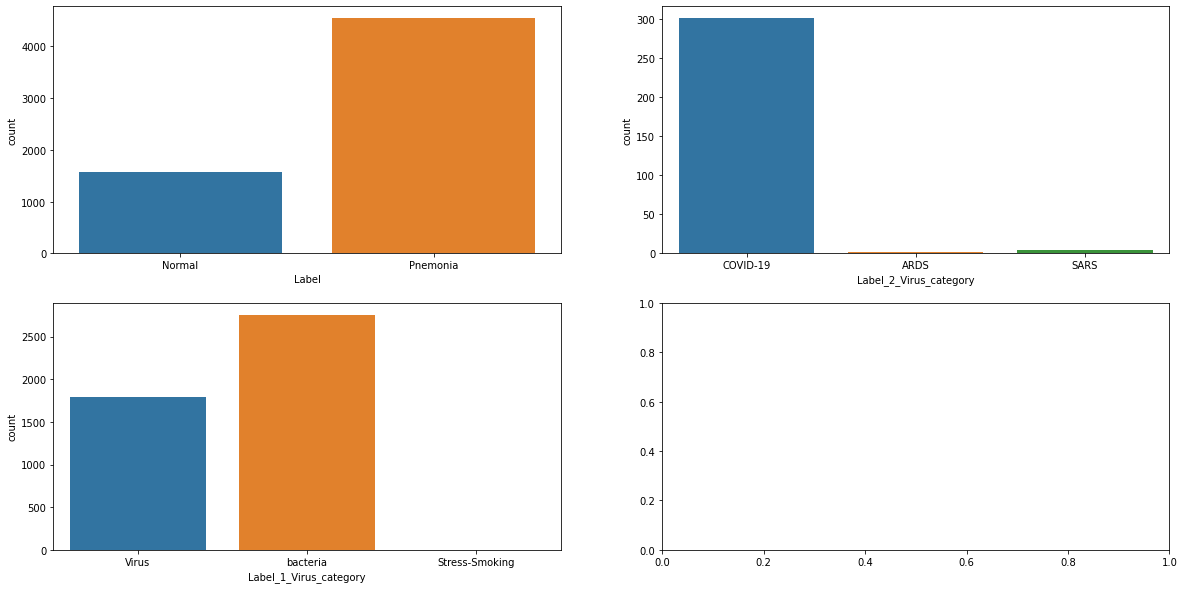

In [37]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=df_mod, ax=ax[0, 0])
sns.countplot(x=targets[1], data=df_mod, ax=ax[0, 1])
sns.countplot(x=targets[2], data=df_mod, ax=ax[1, 0])
plt.show()

#### delete the data related to Stress-Smoking from the csv file and the images 

In [38]:
df_mod.drop(df_mod.index[(df_mod["Label_1_Virus_category"] == "Stress-Smoking")],axis=0,inplace=True)
df_mod

,Unnamed: 0,Unnamed: 0.1,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...,...
6115,238,239,bcb814aa,Pnemonia,TRAIN,COVID-19,Virus
6116,239,240,a8ac1969,Pnemonia,TRAIN,COVID-19,Virus
6117,240,241,76093afc,Pnemonia,TRAIN,COVID-19,Virus
6118,241,242,82a78c13,Pnemonia,TRAIN,COVID-19,Virus


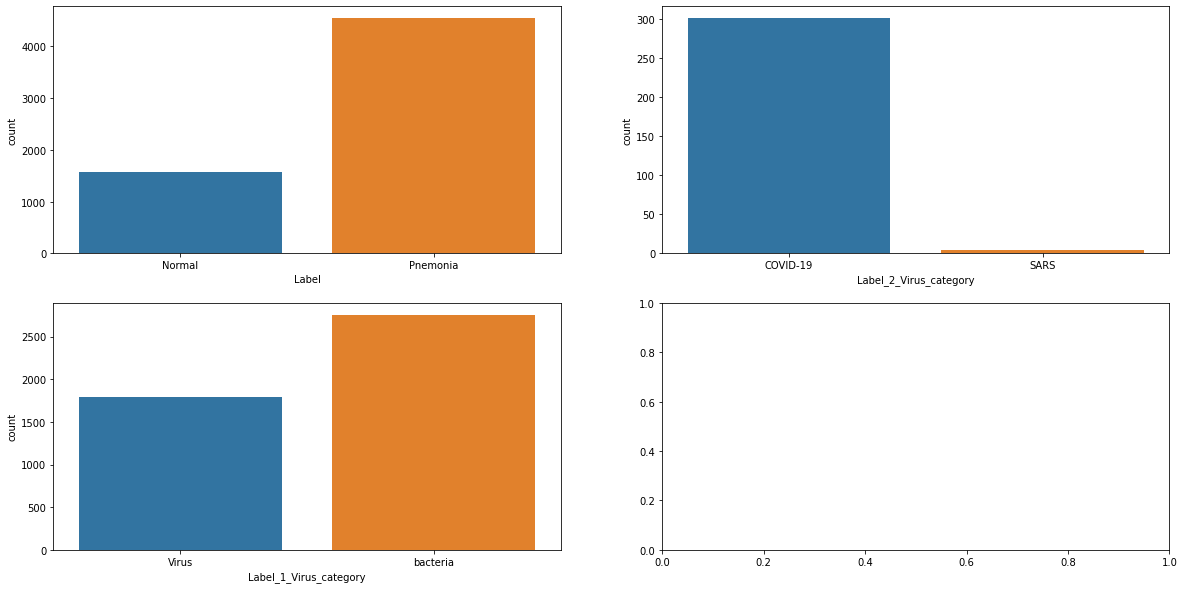

In [39]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=df_mod, ax=ax[0, 0])
sns.countplot(x=targets[1], data=df_mod, ax=ax[0, 1])
sns.countplot(x=targets[2], data=df_mod, ax=ax[1, 0])
plt.show()

In [41]:
# df_mod.to_csv("last_mod.csv")

# Classify the data into sub-folders

In [42]:
import shutil
from tqdm import tqdm

In [43]:
os.getcwd()

'/mnt/c/Users/user/Doctoraizer'

In [44]:
df_mod_2=pd.read_csv('last_mod.csv')
train_data = df_mod_2[df_mod_2['Dataset_type'] == 'TRAIN']
test_data = df_mod_2[df_mod_2['Dataset_type'] == 'TEST']

In [45]:
def create_directory():
    try:
        os.makedirs('Coronahack-Chest-XRay-Dataset/train/Pnemonia')
        os.makedirs('Coronahack-Chest-XRay-Dataset/train/Normal')
        os.makedirs('Coronahack-Chest-XRay-Dataset/test/Pnemonia')
        os.makedirs('Coronahack-Chest-XRay-Dataset/test/Normal')
    except:
        pass

create_directory()

In [46]:
# Pnemonia
to_train_pnemonia = 'Coronahack-Chest-XRay-Dataset/train/Pnemonia'
source_train = 'Coronahack-Chest-XRay-Dataset/train'
move_train_pnemonia = train_data[train_data.Label == 'Pnemonia']['X_ray_image_name'].values

for i in tqdm(move_train_pnemonia):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0:
         path = os.path.join(source_train,i+'.png')
    elif i=='5.63E+09':
        print ('wrong')     
    else :
        path = os.path.join(source_train,i)
    shutil.copy(path,to_train_pnemonia)



100%|██████████| 4154/4154 [06:39<00:00, 10.41it/s]


In [47]:
# Normal
to_train_normal = 'Coronahack-Chest-XRay-Dataset/train/Normal/'
move_train_normal = train_data[train_data.Label == 'Normal']['X_ray_image_name'].values
for i in tqdm(move_train_normal):
    path = os.path.join(source_train,i)
    shutil.copy(path,to_train_normal)

100%|██████████| 1341/1341 [05:24<00:00,  4.13it/s]


In [48]:
#for test data

# Pnemonia
test_pnemonia = 'Coronahack-Chest-XRay-Dataset/test/Pnemonia'
source_test = "Coronahack-Chest-XRay-Dataset/test"
move_test_pnemonia = test_data[test_data['Label'] == 'Pnemonia']['X_ray_image_name'].values                               
for i in tqdm(move_test_pnemonia):
    if str(i).count('jpeg')==0 & str(i).count('jpg')==0:
        i+='.png'
    path2 = os.path.join(source_test, i)
    shutil.copy(path2, test_pnemonia)



100%|██████████| 387/387 [00:44<00:00,  8.79it/s]


In [49]:
# Normal
test_normal = 'Coronahack-Chest-XRay-Dataset/test/Normal/'
move_test_normal = test_data[test_data.Label == 'Normal']['X_ray_image_name'].values
for i in tqdm(move_test_normal):
    path3 = os.path.join(source_test, i)
    shutil.copy(path3, test_normal)

100%|██████████| 230/230 [00:30<00:00,  7.63it/s]


In [50]:
def create_sub_directory():
    try:
        os.makedirs('Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus')
        os.makedirs('Coronahack-Chest-XRay-Dataset/train/Pnemonia/bacteria')
        os.makedirs('Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus')
        os.makedirs('Coronahack-Chest-XRay-Dataset/test/Pnemonia/bacteria')
    except:
        pass

create_sub_directory()

In [51]:
#bacteria
train_pnemonia_bacteria = 'Coronahack-Chest-XRay-Dataset/train/Pnemonia/bacteria'
source_train = "Coronahack-Chest-XRay-Dataset/train/Pnemonia"
move_train_pnemonia_bacteria = train_data[train_data['Label_1_Virus_category'] == 'bacteria']['X_ray_image_name'].values
for i in tqdm(move_train_pnemonia_bacteria):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0:
         path = os.path.join(source_train,i+'.png')
    else :
        path = os.path.join(source_train,i)
    shutil.copy(path,train_pnemonia_bacteria)

100%|██████████| 2517/2517 [05:29<00:00,  7.63it/s]


In [52]:
#Virus
train_pnemonia_virus = 'Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus'
source_train= "Coronahack-Chest-XRay-Dataset/train/Pnemonia"
move_train_pnemonia_virus = train_data[train_data['Label_1_Virus_category'] == 'Virus']['X_ray_image_name'].values
for i in tqdm(move_train_pnemonia_virus):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0 :
         path = os.path.join(source_train,i+'.png')
    else :
        path = os.path.join(source_train,i)
    shutil.copy(path,train_pnemonia_virus) 

100%|██████████| 1637/1637 [04:14<00:00,  6.43it/s]


In [53]:
#bacteria1_test
test_pnemonia_bacteria = 'Coronahack-Chest-XRay-Dataset/test/Pnemonia/bacteria'
source_test = "Coronahack-Chest-XRay-Dataset/test/Pnemonia"
move_test_pnemonia_bacteria = test_data[test_data['Label_1_Virus_category'] == 'bacteria']['X_ray_image_name'].values
for i in tqdm(move_test_pnemonia_bacteria):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0 and i.count('.5.63E+09')==0:
         path = os.path.join(source_test,i+'.png')
    else :
        path = os.path.join(source_test,i)
    shutil.copy(path,test_pnemonia_bacteria)


#Virus_test
test_pnemonia_virus = 'Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus'
source_test = "Coronahack-Chest-XRay-Dataset/test/Pnemonia"
move_test_pnemonia_virus = test_data[test_data['Label_1_Virus_category'] == 'Virus']['X_ray_image_name'].values
for i in tqdm(move_test_pnemonia_virus):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0 and i.count('.5.63E+09')==0:
         path = os.path.join(source_test,i+'.png')
    else :
        path = os.path.join(source_test,i)
    shutil.copy(path,test_pnemonia_virus) 

100%|██████████| 147/147 [00:19<00:00,  7.57it/s]


In [54]:
def create_sub_virus_directory():
    try:
        os.makedirs('Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus/covid')
        os.makedirs('Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus/sars')
        os.makedirs('Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus/covid')
        os.makedirs('Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus/sars')
    except:
        pass

create_sub_virus_directory()

In [55]:
#covid
train_pnemonia_covid = 'Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus/covid'
source_train= 'Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus'
move_train_pnemonia_covid = train_data[train_data['Label_2_Virus_category'] == 'COVID-19']['X_ray_image_name'].values
for i in move_train_pnemonia_covid:
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0:
         path = os.path.join(source_train,i+'.png')
    else :
        path = os.path.join(source_train,i)
    shutil.copy(path,train_pnemonia_covid)

#sars
train_pnemonia_sars = 'Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus/sars'
source_train = "Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus"
move_train_pnemonia_sars = train_data[train_data['Label_2_Virus_category'] == 'SARS']['X_ray_image_name'].values
for i in move_train_pnemonia_sars:
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0:
         path = os.path.join(source_train,i+'.png')
    else :
        path = os.path.join(source_train,i)
    shutil.copy(path,train_pnemonia_sars)

In [56]:
#covid_test
test_pnemonia_covid = 'Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus/covid'
source_test= 'Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus'
move_test_pnemonia_covid = test_data[test_data['Label_2_Virus_category'] == 'COVID-19']['X_ray_image_name'].values
for i in tqdm(move_test_pnemonia_covid):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0 and i.count('.5.63E+09')==0:
         path = os.path.join(source_test,i+'.png')
    else :
        path = os.path.join(source_test,i)
    shutil.copy(path,test_pnemonia_covid)

#sars_test
test_pnemonia_sars = 'Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus/sars'
source_test = "Coronahack-Chest-XRay-Dataset/test/Pnemonia/Virus"
move_test_pnemonia_sars = test_data[test_data['Label_2_Virus_category'] == 'SARS']['X_ray_image_name'].values
for i in tqdm(move_test_pnemonia_sars):
    if i.count('jpeg')==0 and i.count('jpg')==0 and i.count('png')==0 and i.count('.5.63E+09')==0:
         path = os.path.join(source_test,i+'.png')
    else :
        path = os.path.join(source_test,i)
    shutil.copy(path,test_pnemonia_sars)

0it [00:00, ?it/s]
0it [00:00, ?it/s]


# Data augmentation

In [72]:
# from keras.preprocessing.image import ImageDataGenerator
# from skimage import io

KeyError: 'tensorflow'

In [73]:
# import numpy as np
# from PIL import Image

# Befor you generate more than an image pay attention to : 
1- image size , you should generate images that are most similar to the original one 
use this code to check the sizes :
```
# image_5 = PIL.Image.open("try_augment/1-s2.0-S0140673620303706-fx1_lrg.jpg")
# width, height = image_5.size
# print(width, height)

```
2-pay attention to the photos number you want : in for loop using i each one will generate that number 
for example you have 5 images , i breaks at 3 this mean you gonna have 4*5=20 images 

tutorial : https://www.youtube.com/watch?v=ccdssX4rIh8&t=965s


In [74]:
# data_gen=ImageDataGenerator(
# rotation_range=10,#random rotation
# width_shift_range=0.2,
# height_shift_range=0.2,
# shear_range=0.2,
# zoom_range=0.2,
# horizontal_flip=True,
# fill_mode='nearest',cval=1
# )


NameError: name 'ImageDataGenerator' is not defined

In [75]:
# #Manually read each image and create an array to be supplied to datagen via flow method
# dataset = []
# image_directory = 'Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus/sars'
# SIZE = 128
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):
#         image = io.imread(image_directory +'/'+ image_name)
#         image = Image.fromarray(image, 'RGB')
#         image = image.resize((2563,1148))    #IMAGE SIZE 
#         dataset.append(np.array(image))
# x = np.array(dataset)
# i = 0
# for batch in data_gen.flow(x, batch_size=16,  
#                           save_to_dir='Coronahack-Chest-XRay-Dataset/train/Pnemonia/Virus/sars', 
#                           save_prefix='aug', 
#                           save_format='png'):
#     i += 1
#     if i > 2:
#         break  # otherwise the generator would loop indefinitely


NameError: name 'io' is not defined